In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import optimize
import sympy as sym
from sympy.plotting import plot
import numpy as np

%matplotlib inline

In [2]:
layer=1
equi_n=[4,4,16,16,16,16,16,16]
n_equi=len(equi_n)
n_atom=sum(equi_n)*layer
p_n_atom=108
ss0=(4.0414*2.5503321132000001)**2

In [3]:
M=26.98
hbar=4.136*10**(-15)/2/math.pi
har=4.136*10**(-15)
kb=8.617 * 10**(-5)
Na=6.0221367*10**(23)

In [4]:
ev=1.60218*10**(-19) #J

In [5]:
( -401.38909/104)

-3.859510480769231

In [6]:
perfect=[
 [ -2, n_atom, -401.38909,    2.91414,    2.91400,    2.91414],
    [ 0, n_atom, -403.18033,    2.27343,    2.27300,    2.27243],
    [ 2, n_atom, -401.89254,    1.87579,    1.87571,    1.87557],
    [ 4, n_atom, -398.11977,    1.42171,    1.42157,    1.42193]]

In [7]:
X=[]
Y=[]
for data in perfect:
    X.append(data[0]/100)
    Y.append(data[3])

## fitting

https://qiita.com/maskot1977/items/e4f5f71200180865986e

In [8]:
def func3(X, a, b, c, d): # 3次式近似
    Y = a + b * X + c * X ** 2 + d * X ** 3
    return Y

In [9]:
def func2(X, a, b, c): # 2次式近似
    Y = a + b * X + c * X ** 2
    return Y

In [10]:
popt, pcov = curve_fit(func2,X,Y) # poptは最適推定値、pcovは共分散
popt

array([  2.3183565 , -26.70752507, 116.64375325])

In [11]:
x=sym.symbols('x')

In [12]:
ks=popt[0]+popt[1]*x+popt[2]*x**2
ks

116.643753250296*x**2 - 26.7075250691843*x + 2.31835649874167

In [13]:
xx = np.linspace(-0.04, 0.06, 100)
yy=[]
for _x  in xx:
    yy.append(ks.subs(x,_x))

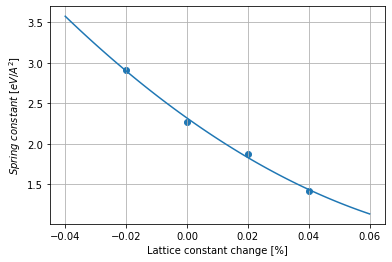

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel('Lattice constant change [%]')  # x軸ラベル
ax.set_ylabel(r"$Spring\;constant\;[eV/A^2]$")  # y軸ラベル
# ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
ax.grid() 
ax.plot(xx,yy)
ax.scatter(X,Y)

In [15]:
X=[]
Y=[]
for data in perfect:
    X.append(data[0]/100)
    Y.append(data[2])

In [16]:
popt, pcov = curve_fit(func3,X,Y) # poptは最適推定値、pcovは共分散
popt

/Users/kyohei/miniforge3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([-4.03180330e+02, -7.63583333e+00,  3.84878750e+03, -1.23760417e+04])

In [17]:
e0=popt[0]+popt[1]*x+popt[2]*x**2+popt[3]*x**3
e0

-12376.0416666693*x**3 + 3848.78750000012*x**2 - 7.63583333333341*x - 403.18033

In [18]:
xx = np.linspace(-0.04, 0.06, 100)
yy=[]
for _x  in xx:
    yy.append(e0.subs(x,_x))

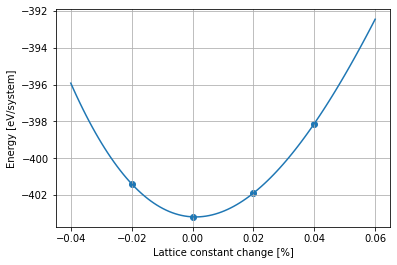

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('Lattice constant change [%]')  # x軸ラベル
ax.set_ylabel('Energy [eV/system]')  # x軸ラベル
# ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
ax.grid() 
ax.plot(xx,yy)
ax.scatter(X,Y)

In [20]:
def p_FreeE(vol,Temp):
    k=ks.subs(x,vol)
    KK=2*k*ev*(10**(10))**2 #J/m^2
    nu=1/(2*math.pi)*sym.sqrt(KK/(M*10**(-3)/Na)); #frequency, omega:angular velocity
    ee=har*nu/(kb*Temp)
    FF1=-kb*Temp*sym.log(sym.exp(-ee/2)/(1-sym.exp(-ee)))
    return e0.subs(x,vol)/p_n_atom+3*FF1

In [21]:
vol=sym.symbols('vol')

In [22]:
X0=np.linspace(-0.025,0.045,100);

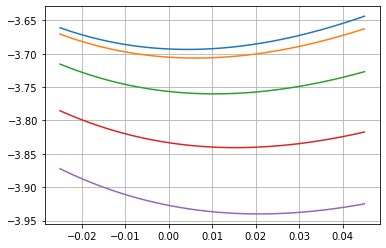

In [23]:
fig, ax = plt.subplots()
ax.grid() 
for T in [10,200,400,600,800]:
    lambdifyFunc = sym.lambdify(vol, p_FreeE(vol,T))
    ax.plot(X0,lambdifyFunc(X0))

In [24]:
def bisection(func,x0,x1,loop=10):
    f0=func.subs(vol,x0)
    f1=func.subs(vol,x1)
    for i in range(loop):
        x_tmp=(x0+x1)/2
        f_tmp=func.subs(vol,x_tmp)
        if f0.evalf()<f1.evalf():
            x1=x_tmp
            f1=f_tmp
        else:
            x0=x_tmp
            f0=f_tmp
    return x_tmp

In [25]:
sol0=[]
t_v=[]
for temp in [1,10,20,40,60,100,200,300,400,500,600,700,800]:
    eq=p_FreeE(vol,temp)
    vol0=bisection(eq,0.0,0.04,100)
    sol0.append([vol0,p_FreeE(vol0,temp)])
    t_v.append([temp,vol0])

In [26]:
sol0

[[0.0042869853229785815, -3.69358724905472],
 [0.004286984205245972, -3.69358724905472],
 [0.0042869842052278544, -3.69358725038638],
 [0.004290344715118409, -3.69359249860059],
 [0.004329412132501603, -3.69368631264726],
 [0.004623675346374511, -3.69486556310544],
 [0.006192402839660643, -3.70651043104879],
 [0.008233994990587239, -3.72915813617862],
 [0.010481211990118023, -3.76014316480208],
 [0.01286791324615457, -3.79769937191575],
 [0.015373406335729669, -3.84067919092439],
 [0.017990927100181332, -3.88829376224803],
 [0.02071860299445688, -3.93997317956603]]

In [27]:
t_v

[[1, 0.0042869853229785815],
 [10, 0.004286984205245972],
 [20, 0.0042869842052278544],
 [40, 0.004290344715118409],
 [60, 0.004329412132501603],
 [100, 0.004623675346374511],
 [200, 0.006192402839660643],
 [300, 0.008233994990587239],
 [400, 0.010481211990118023],
 [500, 0.01286791324615457],
 [600, 0.015373406335729669],
 [700, 0.017990927100181332],
 [800, 0.02071860299445688]]

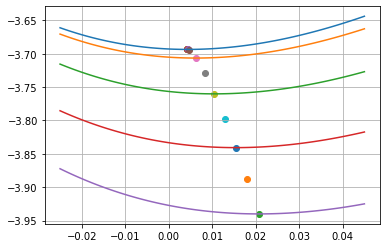

In [28]:
fig, ax = plt.subplots()
ax.grid() 
for T in [10,200,400,600,800]:
    lambdifyFunc = sym.lambdify(vol, p_FreeE(vol,T))
    ax.plot(X0,lambdifyFunc(X0))
for i in range(len(sol0)):
    ax.scatter(sol0[i][0],sol0[i][1])

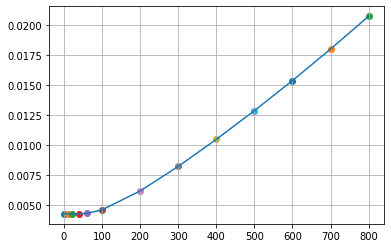

In [29]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
for i in range(len(t_v)):
    X.append(t_v[i][0])
    Y.append(t_v[i][1])
    ax.scatter(t_v[i][0],t_v[i][1])
    
ax.plot(X,Y)

In [30]:
#<MatchData " volume= 0.980" 1:" 0.980">
# for multiple volume calcs

# data_source: ["einstein_5x5.o348"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_m2=[
[ 0, n_atom, -382.28701,    2.19350,    2.19550,    2.45200],
[26, n_atom, -382.28705,    2.88871,    2.88843,    2.49621],
[13, n_atom, -382.28704,    3.01907,    2.99736,    2.81721],
[38, n_atom, -382.28705,    3.01864,    2.88693,    2.86821],
[27, n_atom, -382.28708,    3.26857,    2.65000,    2.87950],
[10, n_atom, -382.28704,    2.30714,    2.27407,    2.94550],
[42, n_atom, -382.28706,    3.01364,    2.30221,    3.42479],
[12, n_atom, -382.28717,    2.81329,    2.72729,    3.86914]]
#<MatchData " volume= 1.000" 1:" 1.000">
# for multiple volume calcs

# data_source: ["einstein_5x5.o348"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_0=[
[ 0, n_atom, -383.78138,    1.71036,    1.71200,    1.89886],
[26, n_atom, -383.78142,    2.28286,    2.28457,    1.94600],
[13, n_atom, -383.78143,    2.40421,    2.37964,    2.21321],
[38, n_atom, -383.78140,    2.39221,    2.28214,    2.24536],
[27, n_atom, -383.78141,    2.60179,    2.08371,    2.26043],
[10, n_atom, -383.78139,    1.80171,    1.78986,    2.32414],
[42, n_atom, -383.78139,    2.41664,    1.81250,    2.74186],
[12, n_atom, -383.78147,    2.23736,    2.17693,    3.16079]]
#<MatchData " volume= 1.020" 1:" 1.020">
# for multiple volume calcs

# data_source: ["einstein_5x5.o348"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_2=[
[ 0, n_atom, -382.34529,    1.30921,    1.31064,    1.43521],
[26, n_atom, -382.34534,    1.77814,    1.78021,    1.48807],
[13, n_atom, -382.34533,    1.88657,    1.86329,    1.70943],
[38, n_atom, -382.34533,    1.87543,    1.77836,    1.73436],
[27, n_atom, -382.34533,    2.05286,    1.61136,    1.75114],
[10, n_atom, -382.34531,    1.38514,    1.38986,    1.81036],
[42, n_atom, -382.34534,    1.92236,    1.41236,    2.17636],
[12, n_atom, -382.34537,    1.76893,    1.72543,    2.56021]]
#<MatchData " volume= 1.040" 1:" 1.040">
# for multiple volume calcs

# data_source: ["einstein_5x5.o348"]
# [no,        E_0,        k_x,        k_y,        k_z],
vol_4=[
[ 0, n_atom, -378.56552,    0.97143,    0.97314,    1.05043],
[26, n_atom, -378.56553,    1.36000,    1.36007,    1.10300],
[13, n_atom, -378.56553,    1.45193,    1.42950,    1.30164],
[38, n_atom, -378.56557,    1.43550,    1.35450,    1.31900],
[27, n_atom, -378.56554,    1.58507,    1.21400,    1.33393],
[10, n_atom, -378.56552,    1.03186,    1.05057,    1.38443],
[42, n_atom, -378.56550,    1.48636,    1.07343,    1.70029],
[12, n_atom, -378.56560,    1.36800,    1.33936,    2.04100]]

In [31]:
ks_all_data=[[-0.02, vol_m2],[0,vol_0],[0.02,vol_2],[0.04,vol_4]]

In [32]:
def second_or_third(x_data,y_data,poly):
    if poly=='second':
        popt, pcov = curve_fit(func2,x_data,y_data) 
        eq_fit=popt[0]+popt[1]*x+popt[2]*x**2
    elif poly=='third':
        popt, pcov = curve_fit(func3,x_data,y_data) 
        eq_fit=popt[0]+popt[1]*x+popt[2]*x**2+popt[3]*x**3
    return eq_fit

In [33]:
def point_plot(x_data,y_data):
    fig, ax = plt.subplots()
    ax.grid() 
    ax.scatter(x_data,y_data)
    plt.close(fig)
    return fig

def curve_plot(f,x_min,x_max):
    xx = np.linspace(x_min, x_max, 100)
    yy=[]
    for _x  in xx:
        yy.append(f.subs(x,_x))
    fig, ax = plt.subplots()
    ax.grid() 
    ax.plot(xx,yy)
    plt.close(fig)
    return fig

def point_curve_plot(x_data,y_data,f,x_min,x_max):
    xx = np.linspace(x_min, x_max, 100)
    yy=[]
    for _x  in xx:
        yy.append(f.subs(x,_x))
    fig, ax = plt.subplots()
    ax.grid() 
    ax.plot(xx,yy)
    ax.scatter(x_data,y_data)
    plt.close(fig)
    return fig

In [34]:
colors=['','','','blue','blue','red','green']

In [35]:
def plot_e0_ks(i_site,e0_poly,ks_poly):
    site_plots=[]
    ks_fig, ks_ax = plt.subplots()
    ks_ax.grid() 
    for j in range(2,6):
        data=[[],[]]
        for element in ks_all_data:
            data[0].append(element[0])
            data[1].append(element[1][i_site][j])
        if j==2:
            f1=second_or_third(data[0],data[1],e0_poly)
            p1=point_curve_plot(data[0],data[1],f1,-0.03,0.05)
        else:
            f1=second_or_third(data[0],data[1],ks_poly)
            p1=point_curve_plot(data[0],data[1],f1,-0.03,0.05)
            
            ks_ax.scatter(data[0],data[1],color=colors[j])
            xx = np.linspace(-0.03,0.05, 100)
            yy=[]
            for _x  in xx:
                yy.append(f1.subs(x,_x))
            ks_ax.plot(xx,yy,color=colors[j])
            plt.close(ks_fig)
        site_plots.append(p1)
    return site_plots,ks_fig

In [62]:
for i in range(n_equi):
    print(i)

0
1
2
3
4
5
6
7


In [36]:
def fitting_select(e0_poly,ks_poly):
    all_d=[]
    for i in range(n_equi):
        i_data=[]
        for j in range(2,6):
            data=[[],[]]
            for element in ks_all_data:
                data[0].append(element[0])
                data[1].append(element[1][i][j])
            if j==2:
                func=second_or_third(data[0],data[1],e0_poly)
            else:
                 func=second_or_third(data[0],data[1],ks_poly)
            i_data.append(func)
        all_d.append(i_data)
    return all_d

In [37]:
all_d=fitting_select('second','second')

In [38]:
def boundary_site_FreeE(vol,Temp,ii,xyz):
    k=all_d[ii][xyz]
    k=k.subs(x,vol)
    KK=2*k*ev*(10**(10))**2 #J/m^2
    nu=1/(2*math.pi)*sym.sqrt(KK/(M*10**(-3)/Na)); #frequency, omega:angular velocity
    ee=har*nu/(kb*Temp)
    FF1=-kb*Temp*sym.log(sym.exp(-ee/2)/(1-sym.exp(-ee)))
    e0=all_d[ii][0]
    return (e0.subs(x,vol)/(n_atom*3)+FF1)*layer

In [39]:
def boundary_total(vol,temp):
    sum0=0.0
    for i in range(n_equi):
        for xyz in range(1,4):
            sum0+=equi_n[i]*boundary_site_FreeE(vol,temp,i,xyz)
    return sum0

In [40]:
bb=boundary_total(t_v[0][1],t_v[0][0])
bb

-379.619826070328

In [41]:
p0=p_FreeE(t_v[0][1],t_v[0][0])*n_atom
p0

-384.133073901691

In [42]:
bb-p0

4.51324783136346

# 513KにおけるF-Vグラフ

In [43]:
bb=boundary_total(vol,513)

In [44]:
xx = np.linspace(-0.04, 0.06, 100)
yy=[]
for _x  in xx:
    yy.append(bb.subs(vol,_x))

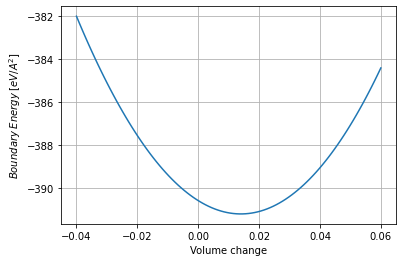

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('Volume change')  # x軸ラベル
ax.set_ylabel(r"$Boundary\;Energy\;[eV/A^2]$")  # y軸ラベル
# ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
ax.grid() 
ax.plot(xx,yy)

In [46]:
def boundary_total_min(volume,t):
    eq=sym.diff(boundary_total(vol,100),vol)
    vol0=bisection(eq,0.0,0.04,100)
    return [boundary_total(vol0,t),vol0]

In [47]:
def defect_energy(temp,vol):
    bb=boundary_total(vol,temp)
    p0=p_FreeE(vol,temp)*n_atom
    d_ene=bb-p0
    return [temp,d_ene,vol]

In [48]:
t_b=[]
rev_t_v=[]
for i in range(len(t_v)):
    tmp=defect_energy(t_v[i][0],t_v[i][1])
    t_b.append([tmp[0],tmp[1].evalf()])
    rev_t_v.append([t_v[i][0],tmp[2]])

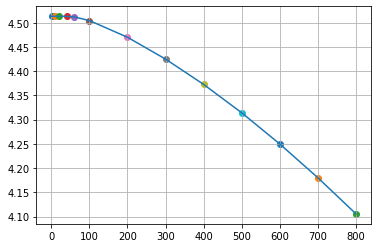

In [49]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
for i in range(len(t_b)):
    X.append(t_b[i][0])
    Y.append(t_b[i][1])
    ax.scatter(t_b[i][0],t_b[i][1])
    
ax.plot(X,Y)

In [50]:
t_b=[]
for i in range(12):
    bb=boundary_total(t_v[i][1],t_v[i][0])
    p0=p_FreeE(t_v[i][1],t_v[i][0])*n_atom
    dde=bb-p0
    ss=ss0*(1.0+t_v[i][1])**2
    de=dde
    es=de/ss* 1.60218 * 10 /2 *1000
    t_b.append([t_v[i][0],es])

In [51]:
t_b

[[1, 337.440860684386],
 [10, 337.440861368311],
 [20, 337.440850253879],
 [40, 337.427725861155],
 [60, 337.307095268582],
 [100, 336.551532062918],
 [200, 332.936084338663],
 [300, 328.246749563975],
 [400, 322.929918841183],
 [500, 317.106451607867],
 [600, 310.836793644529],
 [700, 304.169656152082]]

# 温度依存性

In [52]:
data_1 = [[513, 379], [573, 365], [623, 357], [673, 346], [723, 336], [773, 325]]
data_2 = [[513, 364], [573, 353], [623, 344], [673, 333], [723, 324], [773, 315]]
data_3= [[513, 320], [573, 310], [623, 300], [673, 293], [723, 284], [773, 276]]

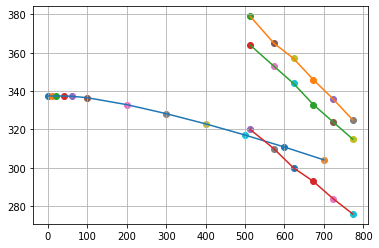

In [53]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
X1=[]
Y1=[]
X2=[]
Y2=[]
X3=[]
Y3=[]
for i in range(len(t_b)):
    X.append(t_b[i][0])
    Y.append(t_b[i][1])
    ax.scatter(t_b[i][0],t_b[i][1])
    
for i in range(len(data_1)):
    X1.append(data_1[i][0])
    Y1.append(data_1[i][1])
    ax.scatter(data_1[i][0],data_1[i][1])
    X2.append(data_2[i][0])
    Y2.append(data_2[i][1])
    ax.scatter(data_2[i][0],data_2[i][1])
    X3.append(data_3[i][0])
    Y3.append(data_3[i][1])
    ax.scatter(data_3[i][0],data_3[i][1])
    
ax.plot(X,Y)
ax.plot(X1,Y1)
ax.plot(X2,Y2)
ax.plot(X3,Y3)

In [54]:
all_ks=[]
for i in range(n_equi):
    for j in range(0,4):
        all_ks.append(all_d[i][j])

In [55]:
vol_m=bisection(p_FreeE(vol,513),0.0,0.04,100)

In [56]:
k_0=ks.subs(x,vol_m)
e_0=e0.subs(x,vol_m)/p_n_atom
ks_disp=[]
for i in range(n_equi):
    for k in range(equi_n[i]):
        for j in range(1,4):
            ks_disp.append(all_d[i][j].subs(x,vol_m))

In [57]:
ks_disp.sort()

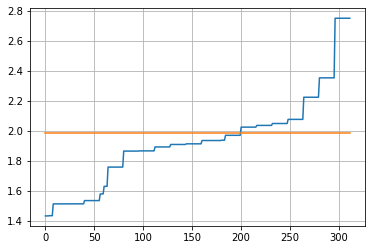

In [58]:
fig, ax = plt.subplots()
ax.grid() 
X=[]
Y=[]
Y0=[] #k_0
for i in range(len(ks_disp)):
    X.append(i)
    Y.append(ks_disp[i])
    Y0.append(k_0)
    
ax.plot(X,Y)
ax.plot(X,Y0)

# 膨張

In [59]:
bisection(boundary_total(vol,513),0.0,0.04,100)

0.014013257026672363